![aula20capa.png](./figuras/aula20capa.png)

Para essa aula pr√°tica, vamos construir um sistema de classifica√ß√£o de imagens usando Python e Jupyter Notebook, aplicando Redes Neurais Convolucionais (CNNs) para processar imagens e Redes Neurais Recorrentes (RNNs) para modelar sequ√™ncias de caracter√≠sticas extra√≠das das imagens.

O objetivo principal √©:

- Carregar e pr√©-processar um dataset de imagens real, usando o conjunto de dados CIFAR-10.
- Criar um modelo de CNN para extra√ß√£o de caracter√≠sticas.
- Criar um modelo de RNN para interpretar sequ√™ncias dessas caracter√≠sticas.
- Treinar e avaliar o modelo.
- Testar a rede com novas imagens.

#### 0 -  Importa√ß√£o das Bibliotecas

In [2]:
import numpy as np  # Biblioteca para manipula√ß√£o de arrays e c√°lculos num√©ricos
import tensorflow as tf  # Framework de aprendizado de m√°quina e deep learning
from tensorflow.keras.models import Sequential  # Classe para criar modelos sequenciais
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, LSTM, Dense, Dropout, TimeDistributed  # Camadas usadas na CNN e RNN
from tensorflow.keras.datasets import cifar10  # Dataset CIFAR-10 para treinamento e teste
from tensorflow.keras.utils import to_categorical  # Fun√ß√£o para converter r√≥tulos em one-hot encoding
import matplotlib.pyplot as plt  # Biblioteca para visualiza√ß√£o de gr√°ficos

2025-02-11 15:13:58.939792: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-02-11 15:13:59.122054: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1739297639.219100  164397 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1739297639.250204  164397 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-11 15:13:59.447052: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

### 1 -  Dataset de exemplo

O CIFAR-10 (Canadian Institute for Advanced Research - 10 classes) √© um dos conjuntos de dados mais usados em aprendizado de m√°quina para tarefas de classifica√ß√£o de imagens. Ele cont√©m pequenas imagens coloridas, tornando-o um excelente ponto de partida para modelos de Redes Neurais Convolucionais (CNNs) e outras arquiteturas de deep learning.

1. Vis√£o Geral do Dataset

    **O CIFAR-10 cont√©m:**

- 60.000 imagens coloridas no formato 32√ó32 pixels.
- 10 classes de objetos, representando categorias do mundo real.
- As imagens s√£o distribu√≠das de forma balanceada entre as classes.
- Os dados j√° est√£o separados em conjuntos de treino e teste:

  -- 50.000 imagens para treino.
  -- 10.000 imagens para teste.

2. Formato das imagens

- Cada imagem tem:

    - Altura: 32 pixels
    - Largura: 32 pixels
    - Canais de cor (RGB): 3 (Vermelho, Verde e Azul)

Isso significa que cada imagem tem uma forma (32, 32, 3).

3. As classes do CIFAR-10

O dataset cont√©m 10 categorias, que representam diferentes objetos do mundo real. Abaixo est√£o as classes e exemplos do que elas representam:

| **√çndice** | **Classe**     | **Descri√ß√£o**                      |
|------------|--------------|--------------------------------|
| 0          | **Airplane**  | Avi√£o, aeronave               |
| 1          | **Automobile**| Carros e ve√≠culos terrestres (exceto caminh√µes) |
| 2          | **Bird**      | P√°ssaros                      |
| 3          | **Cat**       | Gatos                         |
| 4          | **Deer**      | Cervos                        |
| 5          | **Dog**       | C√£es                           |
| 6          | **Frog**      | Sapos e r√£s                   |
| 7          | **Horse**     | Cavalos                        |
| 8          | **Ship**      | Navios e barcos                |
| 9          | **Truck**     | Caminh√µes (sem carros pequenos inclu√≠dos) |


Cada imagem do dataset est√° rotulada com um n√∫mero de 0 a 9, correspondendo a uma dessas classes.

4. Estrutura dos dados

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

- x_train: cont√©m as 50.000 imagens de treino no formato (50000, 32, 32, 3).
- y_train: cont√©m os r√≥tulos correspondentes de cada imagem no formato (50000, 1).
- x_test: cont√©m as 10.000 imagens de teste no formato (10000, 32, 32, 3).
- y_test: cont√©m os r√≥tulos das imagens de teste no formato (10000, 1).

Exemplo de uma imagem individual: Se pegarmos uma √∫nica imagem, ela ter√° a seguinte estrutura:

In [3]:
print(x_train[0].shape)

(32, 32, 3)


Isso confirma que a imagem tem 32 pixels de largura, 32 pixels de altura e 3 canais de cor (RGB).

In [4]:
# Lista dos nomes das classes
class_names = ["Airplane", "Automobile", "Bird", "Cat", "Deer",
               "Dog", "Frog", "Horse", "Ship", "Truck"]

# Selecionar 10 imagens aleat√≥rias
num_images = 10
random_indices = np.random.choice(len(x_train), num_images, replace=False)
selected_images = x_train[random_indices]
selected_labels = y_train[random_indices]

# Criar a figura
plt.figure(figsize=(15, 5))
for i in range(num_images):
    plt.subplot(2, 5, i+1)  # Criar um grid 2x5 para exibir as imagens
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(selected_images[i])
    plt.xlabel(class_names[selected_labels[i][0]])  # Nome da classe correspondente

# Mostrar as imagens
plt.show()

O CIFAR-10 √© um excelente dataset para aprendizado por v√°rios motivos:

‚úÖ Tamanho adequado: N√£o √© t√£o grande que dificulte o treinamento, mas tamb√©m n√£o √© pequeno demais.

‚úÖ Desafio moderado: As imagens s√£o complexas o suficiente para exigir modelos neurais robustos.

‚úÖ Equil√≠brio de classes: Todas as classes possuem a mesma quantidade de amostras, evitando vi√©s.

‚úÖ Facilidade de uso: Est√° integrado ao TensorFlow, permitindo f√°cil carregamento e manipula√ß√£o.

#### 2 -  Normalizar os dados

Normalizamos as imagens para que os valores dos pixels fiquem entre 0 e 1.

In [39]:
# Normalizar os pixels das imagens para valores entre 0 e 1
x_train, x_test = x_train / 255.0, x_test / 255.0

#### 3 -  Categoriza√ß√£o/Padroniza√ß√£o

Convertendo os r√≥tulos em one-hot encoding para serem usados na rede neural.

In [6]:
# Converter os r√≥tulos em one-hot encoding
y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

#### 4 - Construir fun√ß√£o do carregamento dos dados (Modulariza√ß√£o):

In [10]:
# 1. Carregar e preparar os dados
def load_data():
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()

    # Normalizar os pixels das imagens para valores entre 0 e 1
    x_train, x_test = x_train / 255.0, x_test / 255.0

    # Converter os r√≥tulos em one-hot encoding
    y_train, y_test = to_categorical(y_train, 10), to_categorical(y_test, 10)

    return x_train, y_train, x_test, y_test

### 5. Criar a CNN para extra√ß√£o de caracter√≠sticas

In [11]:
def create_cnn():
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),  # Primeira camada convolucional
        MaxPooling2D((2, 2)),  # Redu√ß√£o de dimensionalidade
        Conv2D(64, (3, 3), activation='relu', padding='same'),  # Segunda camada convolucional
        MaxPooling2D((2, 2)),  # Redu√ß√£o de dimensionalidade
        Conv2D(128, (3, 3), activation='relu', padding='same'),  # Terceira camada convolucional
        MaxPooling2D((2, 2)),  # Redu√ß√£o de dimensionalidade
        Flatten(),  # Achatar os dados para camada totalmente conectada
        Dense(128, activation='relu'),  # Camada totalmente conectada com 128 neur√¥nios
        Dropout(0.5)  # Regulariza√ß√£o para evitar overfitting
    ])
    return model

A fun√ß√£o create_cnn() define uma Rede Neural Convolucional (CNN) para extrair caracter√≠sticas das imagens do dataset CIFAR-10. Vamos analisar cada camada e seus par√¢metros.

#### Conv2D ‚Äì Camadas Convolucionais

In [9]:
Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3))

/home/hericson/anaconda3/envs/my_projects/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<Conv2D name=conv2d, built=False>

- O que faz?

Aplica 32 filtros convolucionais, cada um com tamanho 3√ó3, √† imagem de entrada.

Usa a fun√ß√£o de ativa√ß√£o ReLU (Rectified Linear Unit) para introduzir n√£o-linearidade, ajudando na aprendizagem de padr√µes mais complexos.

O padding='same' mant√©m o tamanho da imagem de sa√≠da igual ao da entrada.

O input_shape=(32, 32, 3) define que a entrada da rede s√£o imagens de 32x32 pixels com 3 canais de cor (RGB).

- Motivo dessa configura√ß√£o:

Tamanho do kernel (3x3): Pequeno o suficiente para capturar detalhes, mas grande o bastante para entender padr√µes locais.

N√∫mero de filtros (32): Uma quantidade moderada para capturar v√°rias caracter√≠sticas iniciais sem sobrecarregar a rede.

ReLU: Evita problemas de satura√ß√£o de gradiente (vanishing gradient).


#### MaxPooling2D ‚Äì Camadas de Pooling

In [10]:
MaxPooling2D((2, 2))

<MaxPooling2D name=max_pooling2d, built=True>

- O que faz?

Aplica max pooling com uma janela de 2x2, reduzindo a dimensionalidade espacial da imagem pela metade.

Apenas o valor m√°ximo da regi√£o 2x2 √© mantido.

- Motivo dessa configura√ß√£o:

Reduz o n√∫mero de par√¢metros e o custo computacional.

Ajuda a capturar caracter√≠sticas mais robustas, removendo varia√ß√µes pequenas.

Evita overfitting, pois a rede se concentra em padr√µes mais globais em vez de detalhes espec√≠ficos.

#### Segunda e terceira camadas convolucionais

In [11]:
Conv2D(64, (3, 3), activation='relu', padding='same')
MaxPooling2D((2, 2))
Conv2D(128, (3, 3), activation='relu', padding='same')
MaxPooling2D((2, 2))

<MaxPooling2D name=max_pooling2d_2, built=True>

- O que fazem?

Aumentam o n√∫mero de filtros para 64 e depois 128, permitindo detectar padr√µes cada vez mais complexos.

Cada camada convolucional extrai caracter√≠sticas mais abstratas, enquanto as camadas de MaxPooling reduzem a dimensionalidade.

- Motivo dessa configura√ß√£o:

Aumento progressivo dos filtros (de 32 ‚Üí 64 ‚Üí 128) melhora a capacidade da rede de aprender caracter√≠sticas mais detalhadas.

Camadas mais profundas capturam padr√µes complexos, como bordas, texturas e formas.

#### Flatten ‚Äì Transforma√ß√£o para camada densa

In [12]:
Flatten()

<Flatten name=flatten, built=False>

- O que faz?

Converte a sa√≠da 3D da CNN em um vetor unidimensional, necess√°rio para alimentar camadas totalmente conectadas (Dense).

- Motivo dessa configura√ß√£o:

A CNN extrai features espaciais, mas para classificar as imagens, precisamos de uma camada densa que processe essas informa√ß√µes.

#### Dense ‚Äì Camada Totalmente Conectada

In [13]:
Dense(128, activation='relu')

<Dense name=dense, built=False>

- O que faz?

Camada densa com 128 neur√¥nios, ativada por ReLU.

Ajuda a aprender combina√ß√µes mais abstratas das caracter√≠sticas extra√≠das pela CNN.

- Motivo dessa configura√ß√£o:

O n√∫mero 128 √© um bom compromisso entre expressividade e efici√™ncia.

Mais neur√¥nios aumentam a capacidade da rede, mas tamb√©m o risco de overfitting.

#### Dropout ‚Äì Regulariza√ß√£o

In [14]:
Dropout(0.5)

2025-02-11 13:16:16.058033: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


<Dropout name=dropout, built=True>

- O que faz?

Durante o treinamento, desativa aleatoriamente 50% dos neur√¥nios para evitar overfitting.

- Motivo dessa configura√ß√£o:

Evita que a rede memorize o conjunto de treino, melhorando a generaliza√ß√£o.
0.5 √© um valor padr√£o eficaz, removendo metade das conex√µes sem comprometer a aprendizagem.

##  Resumo da Arquitetura

| **Camada**       | **Par√¢metros**                          | **Fun√ß√£o**                          |
|------------------|----------------------------------------|-------------------------------------|
| **Conv2D**       | 32 filtros, (3,3), ReLU, same padding | Extrai caracter√≠sticas iniciais     |
| **MaxPooling2D** | (2,2)                                  | Reduz dimensionalidade              |
| **Conv2D**       | 64 filtros, (3,3), ReLU, same padding | Aprimora padr√µes capturados         |
| **MaxPooling2D** | (2,2)                                  | Reduz dimensionalidade              |
| **Conv2D**       | 128 filtros, (3,3), ReLU, same padding | Extrai caracter√≠sticas complexas    |
| **MaxPooling2D** | (2,2)                                  | Reduz dimensionalidade              |
| **Flatten**      | -                                      | Converte feature maps em vetor      |
| **Dense**        | 128 neur√¥nios, ReLU                    | Aprende padr√µes abstratos           |
| **Dropout**      | 50%                                    | Previne overfitting                 |


----

### 6. Criar a RNN para processar as caracter√≠sticas extra√≠das

In [12]:
def create_rnn():
    model = Sequential([
        # Camada distribu√≠da no tempo para processar caracter√≠sticas
        TimeDistributed(Dense(64, activation='relu'), input_shape=(1, 128)),
        LSTM(64, return_sequences=False),  # Camada LSTM para capturar depend√™ncias temporais
        Dense(10, activation='softmax')  # Camada de sa√≠da para classifica√ß√£o das 10 classes
    ])
    return model

A fun√ß√£o create_rnn() define uma Rede Neural Recorrente (RNN) usando Long Short-Term Memory (LSTM) para processar sequ√™ncias de caracter√≠sticas extra√≠das anteriormente pela CNN. Essa arquitetura permite que a rede aprenda padr√µes temporais nos dados de entrada.

#### Defini√ß√£o do Modelo Sequencial

In [16]:
model = Sequential([])

- O que faz?

Cria um modelo sequencial, onde as camadas s√£o empilhadas uma ap√≥s a outra.

Esse modelo √© apropriado para arquiteturas simples, onde cada camada recebe a sa√≠da da camada anterior.

- Motivo:

F√°cil de construir e interpretar.

Permite adicionar camadas de forma ordenada.

#### Camada TimeDistributed(Dense(64, activation='relu'))

In [17]:
TimeDistributed(Dense(64, activation='relu'), input_shape=(1, 128))

/home/hericson/anaconda3/envs/my_projects/lib/python3.9/site-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


<TimeDistributed name=time_distributed, built=False>

- O que faz?

Aplica uma camada densa (totalmente conectada) independentemente em cada passo da sequ√™ncia temporal.

O par√¢metro input_shape=(1, 128) significa que cada entrada possui 1 time step e 128 caracter√≠sticas (provenientes da CNN).

A ativa√ß√£o ReLU (Rectified Linear Unit) adiciona n√£o-linearidade para ajudar no aprendizado de padr√µes mais complexos.

- Motivo:

Permite que cada frame de tempo passe por uma camada densa antes de ser processado pela LSTM.

Facilita a transi√ß√£o de dados extra√≠dos pela CNN para serem interpretados sequencialmente.


####  Camada LSTM

In [18]:
LSTM(64, return_sequences=False)

<LSTM name=lstm, built=False>

- O que faz?

Camada LSTM (Long Short-Term Memory), um tipo avan√ßado de RNN que pode aprender depend√™ncias de longo prazo.

Possui 64 unidades ocultas, ou seja, 64 c√©lulas de mem√≥ria, cada uma aprendendo uma representa√ß√£o abstrata da entrada.

return_sequences=False indica que somente a √∫ltima sa√≠da da LSTM ser√° enviada para a pr√≥xima camada.

- Motivo:

LSTMs s√£o √≥timas para capturar depend√™ncias temporais.

O par√¢metro return_sequences=False √© usado porque estamos interessados apenas no estado final, que ser√° enviado para a camada de sa√≠da.

#### Camada de Sa√≠da (Dense)

In [19]:
Dense(10, activation='softmax')

<Dense name=dense_2, built=False>

Imagem -> Extrator de Caracter√≠sticas (CNN) -> (RNN) -> Classifica√ß√£o das imagens em probabilidade (softmax)

- O que faz?

Camada totalmente conectada (Dense) com 10 neur√¥nios, correspondente ao n√∫mero de classes no CIFAR-10.

Usa Softmax, uma fun√ß√£o de ativa√ß√£o que transforma os valores em probabilidades para cada classe.

- Motivo:

N√∫mero de neur√¥nios = n√∫mero de classes (10).

Softmax permite que a rede produza probabilidades para cada classe, facilitando a interpreta√ß√£o dos resultados.

## üìå Resumo da Arquitetura

| **Camada**         | **Par√¢metros**                           | **Fun√ß√£o**                         |
|--------------------|-----------------------------------------|------------------------------------|
| **TimeDistributed** | Dense(64, ReLU), input_shape=(1, 128)  | Processa as caracter√≠sticas extra√≠das |
| **LSTM**          | 64 c√©lulas de mem√≥ria, return_sequences=False | Captura depend√™ncias temporais |
| **Dense**         | 10 neur√¥nios, Softmax                    | Classifica√ß√£o das imagens        |


Esta arquitetura permite que a rede:

- Converta caracter√≠sticas extra√≠das pela CNN em sequ√™ncias.
- Aprenda padr√µes temporais usando LSTM.
- Produza probabilidades para cada classe do CIFAR-10.

Essa abordagem √© √∫til para problemas que exigem interpreta√ß√£o de sequ√™ncias, como reconhecimento de gestos ou an√°lise de v√≠deos.

---

### 7. Construir o modelo completo combinando CNN e RNN

In [13]:
def build_combined_model():
    # Criar a CNN
    cnn = create_cnn()
    cnn_input = tf.keras.Input(shape=(32, 32, 3))  # Definir a entrada da CNN
    cnn_output = cnn(cnn_input)  # Chamar a CNN para definir a sa√≠da corretamente

    # Adaptar a sa√≠da da CNN para entrada da RNN
    reshaped_output = tf.keras.layers.Reshape((1, 128))(cnn_output)

    # Criar a RNN
    rnn = create_rnn()
    rnn_output = rnn(reshaped_output)  # Chamar a RNN

    # Construir o modelo final conectando CNN e RNN
    model = tf.keras.Model(inputs=cnn_input, outputs=rnn_output)

    # Compilar o modelo
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model


Essa fun√ß√£o constr√≥i um modelo h√≠brido combinando Redes Neurais Convolucionais (CNNs) e Redes Neurais Recorrentes (RNNs - LSTMs) para classificar imagens do dataset CIFAR-10. A CNN extrai caracter√≠sticas espaciais das imagens, enquanto a RNN aprende rela√ß√µes temporais entre essas caracter√≠sticas.

#### Criar a CNN para extra√ß√£o de caracter√≠sticas

In [23]:
cnn = create_cnn()
cnn_input = tf.keras.Input(shape=(32, 32, 3))
cnn_output = cnn(cnn_input)

#Imagem -> Vetor de 128 caracter√≠sticas

- O que faz?

Chama a fun√ß√£o create_cnn(), que define a Rede Neural Convolucional (CNN) para processar as imagens.

cnn.output obt√©m a sa√≠da da CNN, que cont√©m um vetor de 128 caracter√≠sticas extra√≠das das imagens de entrada.

- Motivo dessa escolha

CNNs s√£o ideais para an√°lise de imagens, pois capturam padr√µes locais (bordas, texturas, formas).

O resultado √© um vetor num√©rico representando cada imagem, pronto para ser processado pela RNN.


 #### Adaptar a sa√≠da da CNN para a entrada da RNN

In [24]:
reshaped_output = tf.keras.layers.Reshape((1, 128))(cnn_output)  # Adaptar para entrada da RNN

- O que faz?

A CNN gera um vetor (128, ), mas a LSTM espera uma sequ√™ncia temporal (formato (timesteps, features)).

Reshape((1, 128)) transforma o vetor em uma sequ√™ncia com 1 time step e 128 caracter√≠sticas.

- Motivo dessa escolha

Esse formato permite que a LSTM veja a sa√≠da da CNN como uma sequ√™ncia temporal.

Essa t√©cnica √© √∫til em an√°lises sequenciais, como v√≠deos, s√©ries temporais ou reconhecimento de padr√µes complexos.


#### Criar a RNN para processar a sequ√™ncia

In [25]:
rnn = create_rnn()
final_output = rnn(reshaped_output)

- O que faz?

create_rnn() cria a Rede Neural Recorrente (RNN) com LSTM.

A RNN recebe reshaped_output (sequ√™ncia de tamanho 1 e 128 caracter√≠sticas).

A LSTM processa essa entrada e gera um vetor de 10 probabilidades (uma para cada classe do CIFAR-10).

- Motivo dessa escolha

LSTMs s√£o poderosas para aprender padr√µes temporais, ent√£o podem ajudar na classifica√ß√£o ao interpretar a sequ√™ncia de caracter√≠sticas
extra√≠das pela CNN.

Essa abordagem permite combinar representa√ß√µes espaciais e temporais na classifica√ß√£o.

#### Criar e compilar o modelo final

In [26]:
model = tf.keras.Model(inputs=cnn.input, outputs=final_output)

- O que faz?

Define o modelo final com entrada na CNN e sa√≠da na RNN.

A CNN processa a imagem e a RNN classifica os padr√µes aprendidos.

#### Compilar o modelo

In [27]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Compila√ß√£o do modelo

- O que faz?

optimizer='adam' ‚Üí Usa Adam, um otimizador eficiente para deep learning.

loss='categorical_crossentropy' ‚Üí Como temos 10 classes, usamos a entropia cruzada categ√≥rica.

metrics=['accuracy'] ‚Üí Avaliamos o modelo com acur√°cia.

- Motivo dessa escolha

Adam ajusta automaticamente a taxa de aprendizado, acelerando a converg√™ncia.

Entropia cruzada √© a melhor fun√ß√£o de perda para classifica√ß√£o multiclasse.

Acur√°cia √© a m√©trica padr√£o para avaliar modelos de classifica√ß√£o.

###  Resumo da Arquitetura

| **Etapa**            | **A√ß√£o**                                      | **Motivo**                                    |
|----------------------|--------------------------------|--------------------------------|
| **Criar CNN**       | Extrai caracter√≠sticas das imagens | Captura padr√µes visuais       |
| **Adaptar sa√≠da**   | Transforma vetor CNN para sequ√™ncia | Permite entrada compat√≠vel com LSTM |
| **Criar RNN**       | Aprende depend√™ncias na sequ√™ncia | Combina padr√µes espaciais e temporais |
| **Criar modelo final** | Conecta CNN e RNN | Permite fluxo de dados cont√≠nuo |
| **Compilar modelo** | Define otimizador e fun√ß√£o de perda | Melhora efici√™ncia e desempenho |
| **Retornar modelo** | Entrega modelo pronto para treino | Permite treinamento imediato |



Essa abordagem combina CNN + RNN para melhorar a classifica√ß√£o de imagens, explorando:

- CNN para aprender padr√µes espaciais (bordas, formas, texturas).

- LSTM para aprender padr√µes temporais (combina√ß√µes de caracter√≠sticas).

- Treinamento eficiente com Adam e entropia cruzada.

---

### 8. Treinar e avaliar o modelo

In [4]:
def train_and_evaluate():
    x_train, y_train, x_test, y_test = load_data()
    model = build_combined_model()

    print(model.summary())  # Exibir a estrutura do modelo

    history = model.fit(x_train, y_train, epochs=20, batch_size=64, validation_data=(x_test, y_test))  # Treinamento

    # Avalia√ß√£o do modelo
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    print(f'Test accuracy: {test_acc:.4f}')

    return model, history

Essa fun√ß√£o realiza tr√™s tarefas principais:

- Carregar os dados do CIFAR-10.
- Construir e treinar o modelo h√≠brido (CNN + RNN).
- Avaliar a performance do modelo treinado

#### Carregar os dados

In [29]:
x_train, y_train, x_test, y_test = load_data()

- O que faz?

Chama a fun√ß√£o load_data(), que carrega o dataset CIFAR-10 e retorna:

- x_train: Imagens de treinamento (50.000 imagens de 32√ó32√ó3).
- y_train: R√≥tulos das imagens de treinamento (codificados em one-hot encoding).
- x_test: Imagens de teste (10.000 imagens de 32√ó32√ó3).
- y_test: R√≥tulos das imagens de teste.

- Motivo dessa escolha

CIFAR-10 √© um dataset balanceado, ideal para testes com CNNs e RNNs.

A separa√ß√£o em treino e teste previne overfitting, garantindo que o modelo seja avaliado corretamente.


#### Construir o modelo h√≠brido (CNN + RNN)

In [30]:
model = build_combined_model()

- O que faz?

Chama build_combined_model(), que combina CNN e RNN para classificar imagens.

Retorna o modelo j√° compilado e pronto para treinamento.

- Motivo dessa escolha

A CNN extrai caracter√≠sticas espaciais (bordas, texturas, formas).

A RNN interpreta sequ√™ncias de caracter√≠sticas para melhorar a classifica√ß√£o.

Esse modelo pode aprender padr√µes mais complexos do que uma CNN tradicional.


#### Exibir a estrutura do modelo

In [31]:
print(model.summary())

Model: "functional_7"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ input_layer_8 (InputLayer)      ‚îÇ (None, 32, 32, 3)      ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ sequential_5 (Sequential)       ‚îÇ (None, 128)            ‚îÇ       355,520 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ reshape_1 (Reshape)             ‚îÇ (None, 1, 128)         ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ sequential_6 (Sequential)       ‚îÇ (None, 10)             ‚îÇ        41,930 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 397,450 (1.52 MB)

 Trainable params: 397,450 (1.52 MB)

 Non-trainable params: 0 (0.00 B)

None


- O que faz?

Imprime um resumo da arquitetura do modelo, mostrando:

O n√∫mero de camadas.

O n√∫mero de par√¢metros trein√°veis.

A estrutura de entrada e sa√≠da.

- Motivo dessa escolha

Permite validar se a CNN e a RNN foram corretamente empilhadas.

Ajuda a identificar erros de forma na arquitetura antes do treinamento.

#### Treinar o modelo

In [51]:
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
782/782 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 34s 44ms/step - accuracy: 0.1022 - loss: 2.3524 - val_accuracy: 0.1000 - val_loss: 2.3037
Epoch 2/10
782/782 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 33s 42ms/step - accuracy: 0.1007 - loss: 2.3036 - val_accuracy: 0.1000 - val_loss: 2.3035
Epoch 3/10
782/782 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 31s 40ms/step - accuracy: 0.0981 - loss: 2.3037 - val_accuracy: 0.1000 - val_loss: 2.3030
Epoch 4/10
782/782 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 31s 39ms/step - accuracy: 0.1014 - loss: 2.3035 - val_accuracy: 0.1000 - val_loss: 2.3030
Epoch 5/10
782/782 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 30s 38ms/step - accuracy: 0.0972 - loss: 2.3035 - val_accuracy: 0.1000 - val_loss: 2.3030
Epoch 6/10
782/782 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 30s 39ms/step - accuracy: 0.0958 - loss: 2.3038 - val_accuracy: 0.1000

- O que faz?

Treina o modelo com os dados de treinamento (x_train, y_train).

Executa o treinamento por 10 √©pocas.

Usa um batch size de 64 (atualiza os pesos a cada 64 imagens).

Separa dados de valida√ß√£o (x_test, y_test) para medir a performance durante o treino.

- Motivo das escolhas


| **Par√¢metro**                 | **Motivo** |
|-------------------------------|-----------|
| `epochs=10`                   | Equil√≠brio entre treino e tempo de execu√ß√£o. Modelos mais complexos precisam de mais √©pocas. |
| `batch_size=64`               | Usado para melhorar efici√™ncia no processamento da GPU. Pequenos batches treinam mais r√°pido. |
| `validation_data=(x_test, y_test)` | Ajuda a monitorar o desempenho do modelo durante o treinamento e evitar overfitting. |


#### Avaliar o modelo

In [53]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=1)

313/313 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 9ms/step - accuracy: 0.1019 - loss: 2.3029


- O que faz?

Calcula a acur√°cia final e a fun√ß√£o de perda no conjunto de teste.

verbose=2 controla o n√≠vel de detalhes da sa√≠da (1 exibe progresso detalhado, 2 exibe apenas resultados finais).

- Motivo dessa escolha

Avaliar o modelo em dados nunca vistos garante que ele n√£o est√° simplesmente memorizando o conjunto de treinamento.

O uso de evaluate() garante uma medi√ß√£o objetiva da performance.

----

Essa fun√ß√£o realiza todo o pipeline de machine learning, desde carregar os dados at√© avaliar a performance do modelo treinado.

- Treinamento eficiente com Adam e batch size otimizado
- Avalia√ß√£o usando um conjunto de teste para medir generaliza√ß√£o
- Retorno do hist√≥rico para an√°lise de aprendizado

Com essa abordagem, podemos ajustar hiperpar√¢metros, visualizar curvas de aprendizado e otimizar o modelo!

---

### 9. Executar o treinamento

In [14]:
model, history = train_and_evaluate()

/home/hericson/anaconda3/envs/my_projects/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2025-02-11 15:15:39.032290: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)
/home/hericson/anaconda3/envs/my_projects/lib/python3.9/site-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "functional_2"

‚îè‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î≥‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îì
‚îÉ Layer (type)                    ‚îÉ Output Shape           ‚îÉ       Param # ‚îÉ
‚î°‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚ïá‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚î©
‚îÇ input_layer_1 (InputLayer)      ‚îÇ (None, 32, 32, 3)      ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ sequential (Sequential)         ‚îÇ (None, 128)            ‚îÇ       355,520 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ reshape (Reshape)               ‚îÇ (None, 1, 128)         ‚îÇ             0 ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ sequential_1 (Sequential)       ‚îÇ (None, 10)             ‚îÇ        41,930 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

 Total params: 397,450 (1.52 MB)

 Trainable params: 397,450 (1.52 MB)

 Non-trainable params: 0 (0.00 B)

None
Epoch 1/20
782/782 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 34s 39ms/step - accuracy: 0.2447 - loss: 1.9916 - val_accuracy: 0.4516 - val_loss: 1.5095
Epoch 2/20
782/782 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 30s 39ms/step - accuracy: 0.4679 - loss: 1.4521 - val_accuracy: 0.5646 - val_loss: 1.1982
Epoch 3/20
782/782 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 31s 39ms/step - accuracy: 0.5645 - loss: 1.2185 - val_accuracy: 0.6361 - val_loss: 1.0346
Epoch 4/20
782/782 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 33s 42ms/step - accuracy: 0.6145 - loss: 1.0789 - val_accuracy: 0.6707 - val_loss: 0.9370
Epoch 5/20
782/782 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 31s 40ms/step - accuracy: 0.6503 - loss: 0.9945 - val_accuracy: 0.6943 - val_loss: 0.8841
Epoch 6/20
782/782 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 30s 38ms/step - accuracy: 0.6800 - loss: 0.9073 - val_accuracy: 0

---

### 10. Visualizar a curva de aprendizado

In [15]:
def plot_learning_curve(history):
    plt.plot(history.history['accuracy'], label='Acur√°cia no Treino')
    plt.plot(history.history['val_accuracy'], label='Acur√°cia na Valida√ß√£o')
    plt.xlabel('√âpoca')
    plt.ylabel('Acur√°cia')
    plt.legend()
    plt.show()

plot_learning_curve(history)

---

Agora que treinamos e avaliamos nosso modelo, podemos test√°-lo com imagens novas que n√£o pertencem ao conjunto CIFAR-10.

Abaixo est√£o dois m√©todos para testar o modelo:

1) Usando imagens do conjunto de teste do CIFAR-10 (para verificar previs√µes em dados conhecidos).

2) Carregando imagens externas (imagens pr√≥prias)

### 1)Testando com imagens do CIFAR-10

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Lista de classes do CIFAR-10
class_names = ["Airplane", "Automobile", "Bird", "Cat", "Deer",
               "Dog", "Frog", "Horse", "Ship", "Truck"]

def test_on_cifar10(model, x_test, y_test, num_samples=5):
    """
    Testa o modelo em 'num_samples' imagens aleat√≥rias do conjunto de teste CIFAR-10.
    """
    indices = np.random.choice(len(x_test), num_samples, replace=False)
    selected_images = x_test[indices]
    selected_labels = np.argmax(y_test[indices], axis=1)

    predictions = np.argmax(model.predict(selected_images), axis=1)

    # Exibir imagens e previs√µes
    plt.figure(figsize=(10, 5))
    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(selected_images[i])
        plt.xlabel(f"Real: {class_names[selected_labels[i]]}\nPred: {class_names[predictions[i]]}")

    plt.show()

x_train, y_train, x_test, y_test = load_data()
# Testar o modelo treinado no conjunto de teste
test_on_cifar10(model, x_test, y_test, num_samples= 6)


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 290ms/step


- Selecionamos num_samples imagens aleat√≥rias do conjunto de teste.

- O modelo faz previs√µes e compararmos com os r√≥tulos reais.

- As imagens s√£o exibidas com os r√≥tulos reais e previstos.

---

### 2) Testando com imagens externas

Para testar imagens que n√£o fazem parte do CIFAR-10, precisamos:

1) Carregar a imagem de um arquivo.

2) Redimension√°-la para 32√ó32 pixels.

3) Normaliz√°-la (assim como fizemos no pr√©-processamento).

4) Fazer a previs√£o com o modelo.

1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 256ms/step
Classe prevista: Airplane


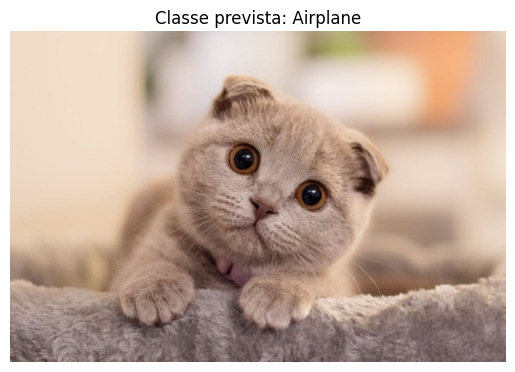

In [17]:
import cv2
from tensorflow.keras.preprocessing import image

def predict_external_image(model, img_path):
    """
    Faz a previs√£o de uma imagem externa usando o modelo treinado.
    """
    img = cv2.imread(img_path)  # Carregar imagem
    img = cv2.resize(img, (32, 32))  # Redimensionar para 32x32 pixels
    img = img.astype("float32") / 255.0  # Normalizar os valores dos pixels
    img = np.expand_dims(img, axis=0)  # Adicionar dimens√£o extra para batch

    # Fazer previs√£o
    prediction = np.argmax(model.predict(img), axis=1)[0]

    print(f"Classe prevista: {class_names[prediction]}")

    # Exibir a imagem
    plt.imshow(image.load_img(img_path))
    plt.axis("off")
    plt.title(f"Classe prevista: {class_names[prediction]}")
    plt.show()

# Exemplo: testar com uma imagem externa (substitua 'caminho_da_imagem.jpg' pelo caminho real)
predict_external_image(model, "figuras/gato.jpg")


In [38]:
#pip install opencv-python

- Carregamos uma imagem externa usando cv2.imread().

- Redimensionamos para 32√ó32 pixels (necess√°rio para o modelo).

- Normalizamos os valores para ficar no intervalo [0,1].

- Adicionamos uma dimens√£o extra para que a rede interprete como um batch.

- Fazemos a previs√£o e exibimos a classe predita.
